In [38]:
#!pip install pystan~=2.14

In [39]:
#!pip install fbprophet

In [40]:
#!pip install yfinance

In [41]:
import fbprophet as fb
import yfinance as yf
import pandas as pd

In [ ]:
df = yf.download('BTC-USD')

In [43]:
df.head(2)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [44]:
df.reset_index(inplace=True)
df = df[['Date','Adj Close']]
df.head()

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


<Axes: >

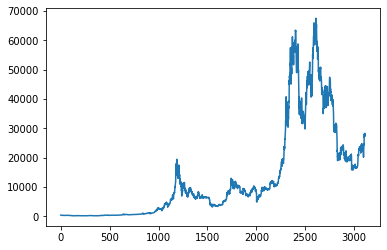

In [45]:
df['Adj Close'].plot()

In [46]:
df.isnull().sum()

Date         0
Adj Close    0
dtype: int64

In [47]:
df.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)

<ipython-input-47-04650c24fd32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)


In [48]:
df.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [49]:
from fbprophet import Prophet
model = Prophet()

In [ ]:
model.fit(df)

In [ ]:
pred = model.predict()

In [54]:
future_predict = model.make_future_dataframe(periods=20)

In [ ]:
# create a future data frame 
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

In [59]:
import matplotlib.pyplot as plt

   

In [ ]:
from pandas.core.ops.array_ops import Any
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = Prophet.plot(forecast,fcst)

In [61]:
from  fbprophet.plot import plot_plotly
plot_plotly(model,pred)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



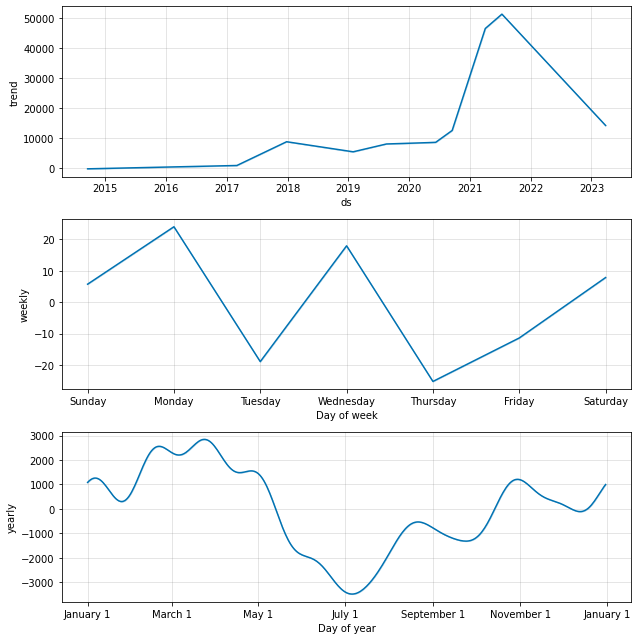

In [62]:
fig2 = model.plot_components(pred)